# Information 😊
- **Name:** Mohamed Ibrahim Sayed
- **ID:** 236671
- **Course:** Probability And Statistics

---



In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", message="The 'mad' method is deprecated*")




line = "-" * 100

In [164]:
df = pd.read_csv("Diabetes Dataset.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [165]:
# show the data infos
data = df
infos = pd.DataFrame({"dataTypes":data.dtypes,"num Unique": data.nunique(),
              "not null": data.shape[0] - data.isnull().sum(),
              "ratio not null":(data.shape[0] - data.isnull().sum()) / data.shape[0],
              "Null Values": data.isnull().sum(),
              "Null Ration":(data.isnull().sum())/ data.shape[0] }).T
print(f"[{data.shape[0]} Rows x {data.shape[1]} Columns]")
infos


[768 Rows x 9 Columns]


Pregnancies Glucose BloodPressure SkinThickness Insulin  \
dataTypes            int64   int64         int64         int64   int64   
num Unique              17     136            47            51     186   
not null               768     768           768           768     768   
ratio not null         1.0     1.0           1.0           1.0     1.0   
Null Values              0       0             0             0       0   
Null Ration            0.0     0.0           0.0           0.0     0.0   

                    BMI DiabetesPedigreeFunction    Age Outcome  
dataTypes       float64                  float64  int64   int64  
num Unique          248                      517     52       2  
not null            768                      768    768     768  
ratio not null      1.0                      1.0    1.0     1.0  
Null Values           0                        0      0       0  
Null Ration         0.0                      0.0    0.0     0.0

In [166]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [167]:
df.corr().round(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   
Outcome                          0.22     0.47           0.07           0.07   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07  0.02                     -0.03  0.54   
Glucose                      0.33  0.22                      0.14  0.26   
BloodPressure                0.09  0.28                      0.04  0.24   
SkinThickness                0.44  0.39                      0.18 -0.11   
Insulin                      1.00  0.20                      0.19 -0.04   
BMI                          0.20  1.00                      0.14  0.04   
DiabetesPedigreeFunction     0.19  0.14                      1.00  0.03   
Age                         -0.04  0.04                      0.03  1.00   
Outcome                      0.13  0.29                      0.17  0.24   

                          Outcome  
Pregnancies                  0.22  
Glucose                      0.47  
BloodPressure                0.07  
SkinThickness                0.07  
Insulin                      0.13  
BMI                          0.29  
DiabetesPedigreeFunction     0.17  
Age                          0.24  
Outcome                      1.00

<Axes: >

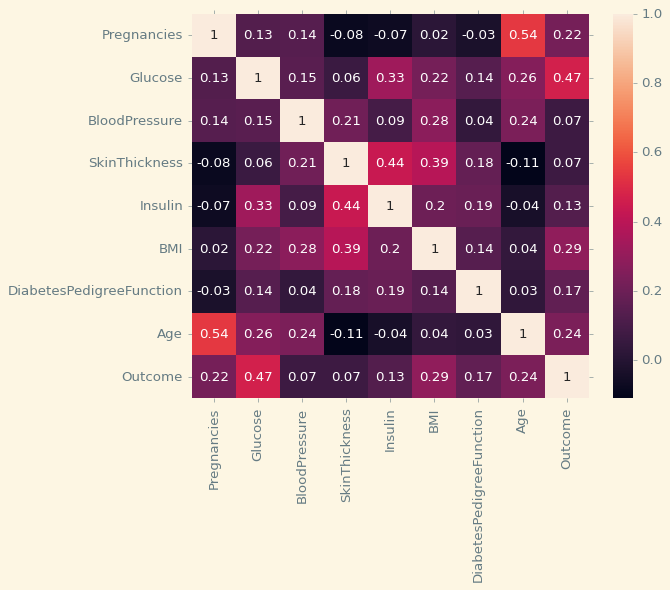

In [168]:
# draw heat map to show the correlation
sns.heatmap(df.corr().round(2), annot=True)

<Axes: >

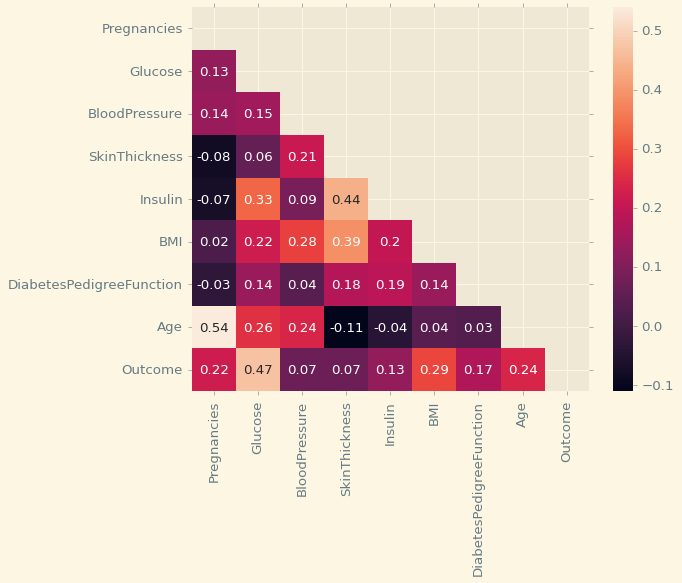

In [169]:
# show the heat map without the dublicates -
#   also remove the diagonal that all is one
mat = df.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, annot=True, mask=mask)

In [170]:
# show the columns that make correlation above specifc number (0.5)

mat2 = df.corr()
mat2 = mat2.unstack()
result = mat2[(abs(mat2) > 0.5) & (mat2 != 1)].reset_index()
result = result.drop_duplicates(subset=["level_0","level_1"])
result

level_0      level_1         0
0  Pregnancies          Age  0.544341
1          Age  Pregnancies  0.544341

----------------------------------------------------------------------------------------------------


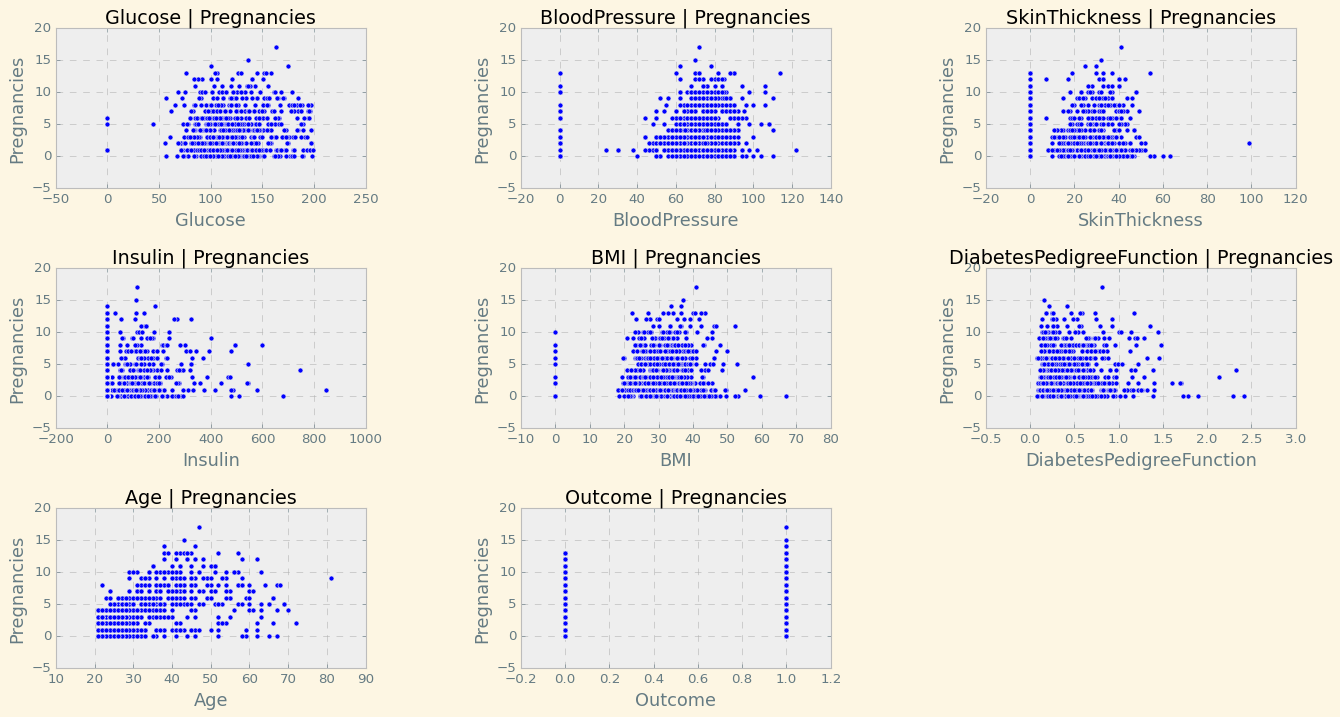

----------------------------------------------------------------------------------------------------


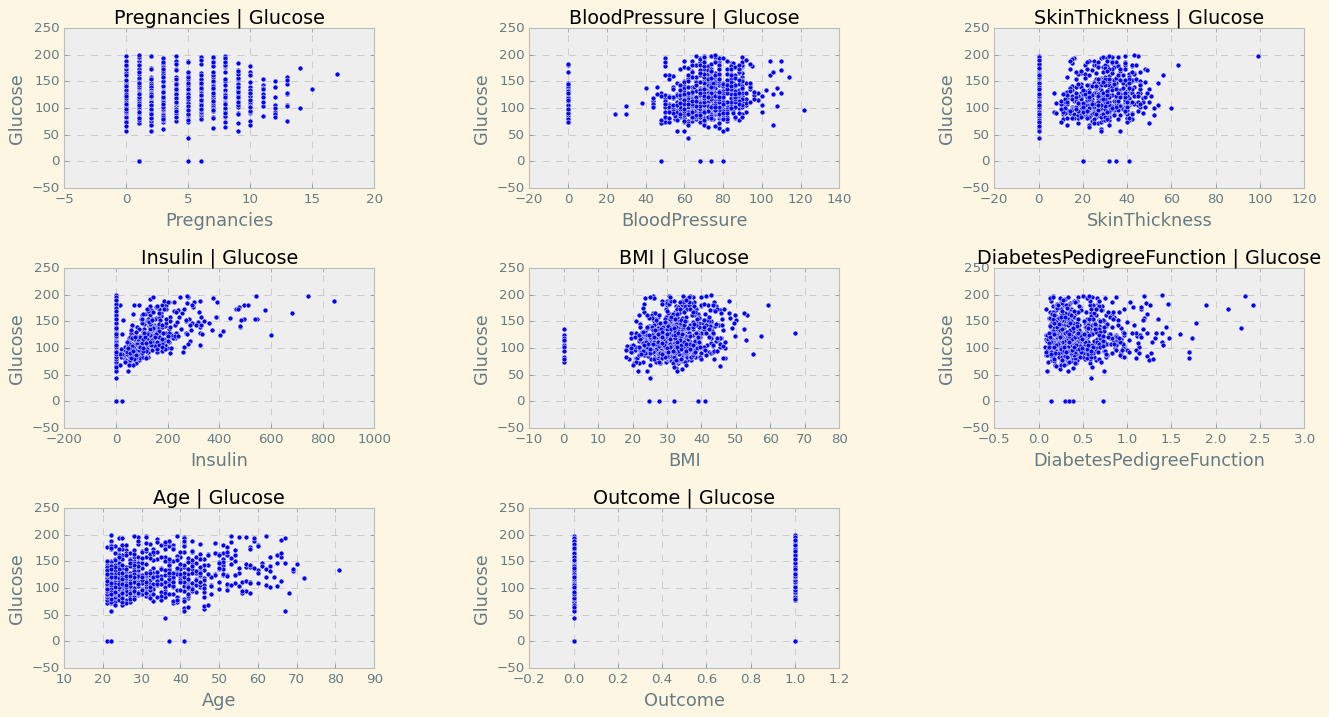

----------------------------------------------------------------------------------------------------


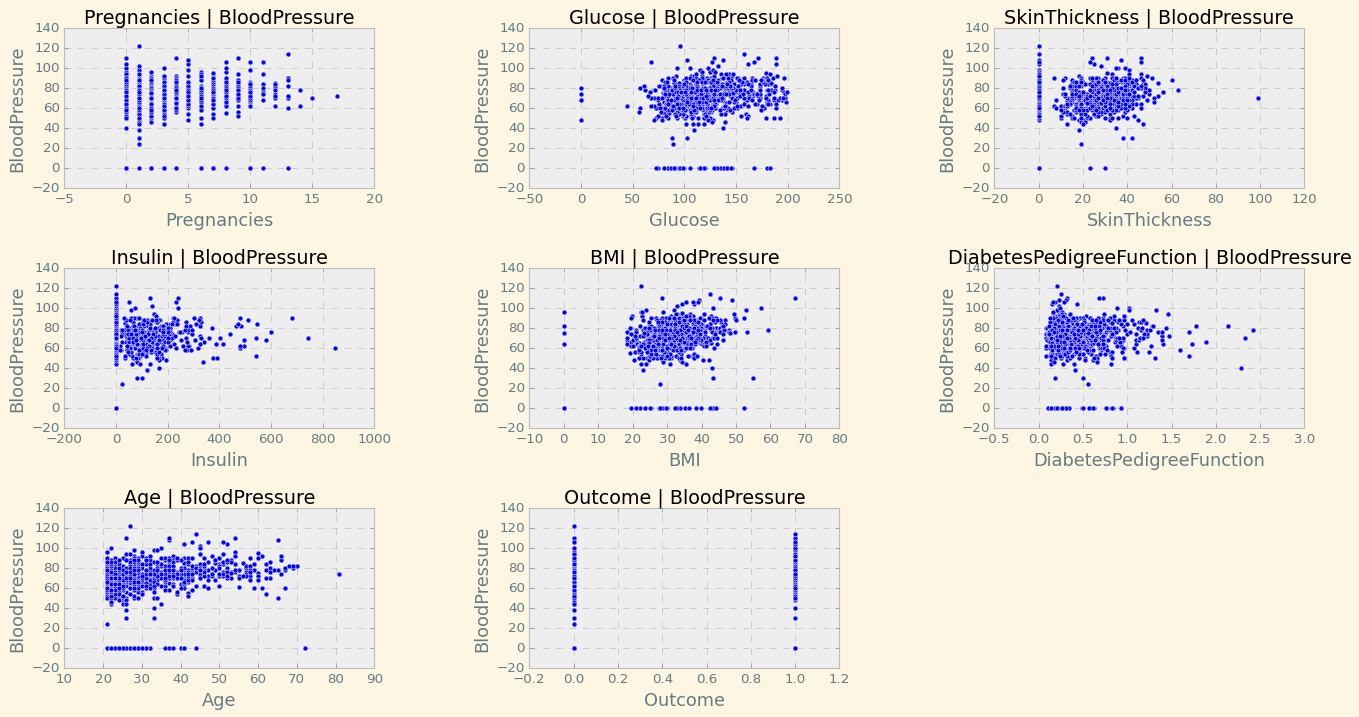

----------------------------------------------------------------------------------------------------


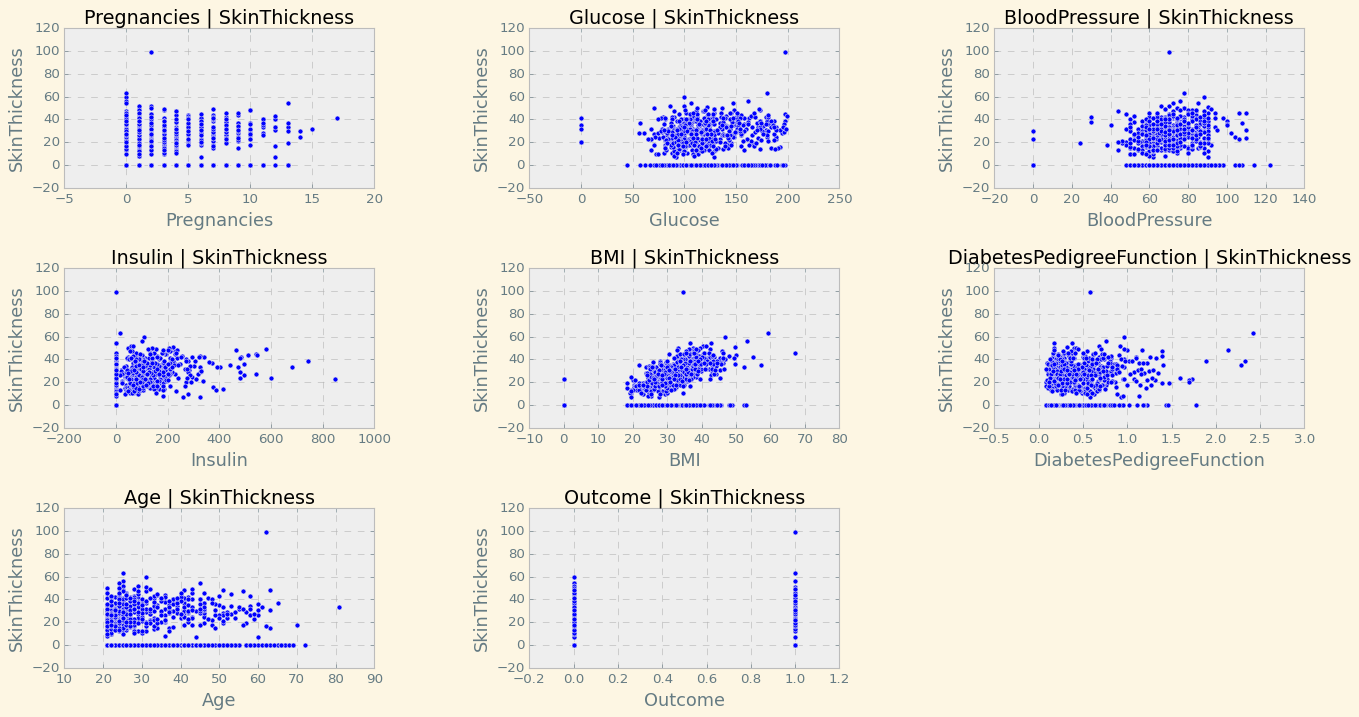

----------------------------------------------------------------------------------------------------


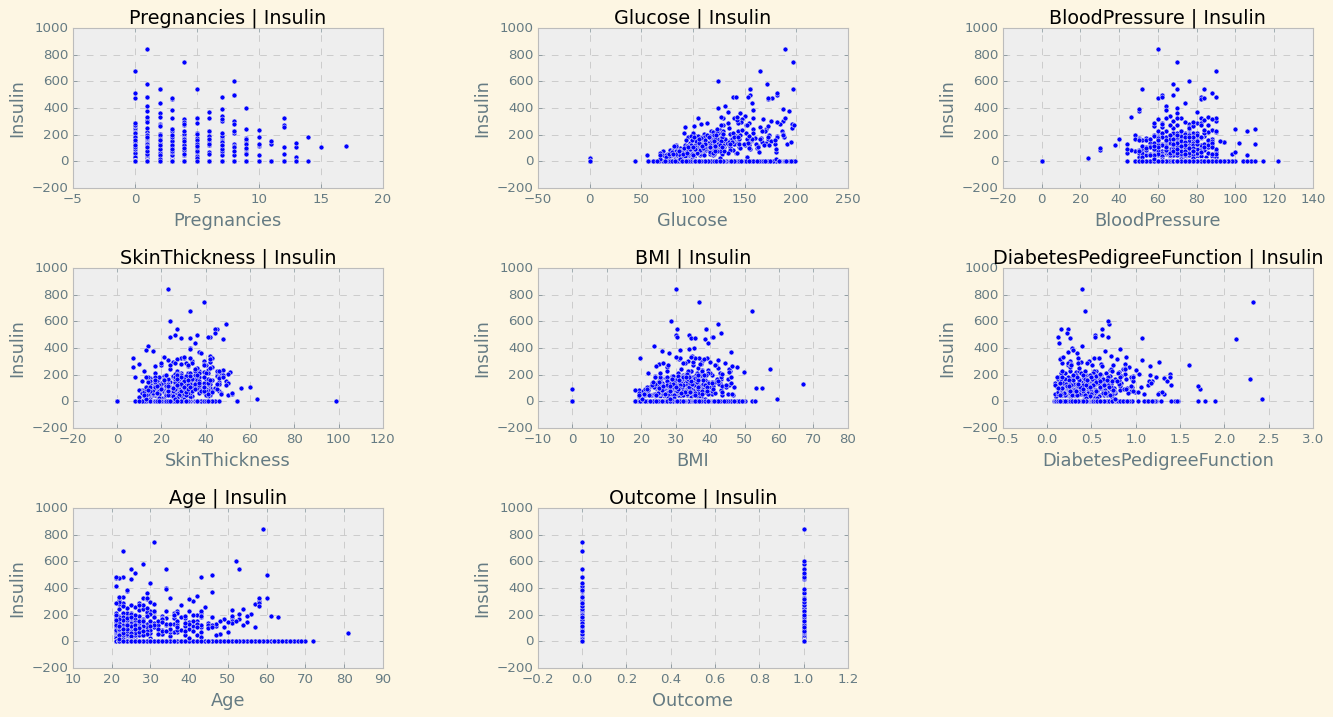

----------------------------------------------------------------------------------------------------


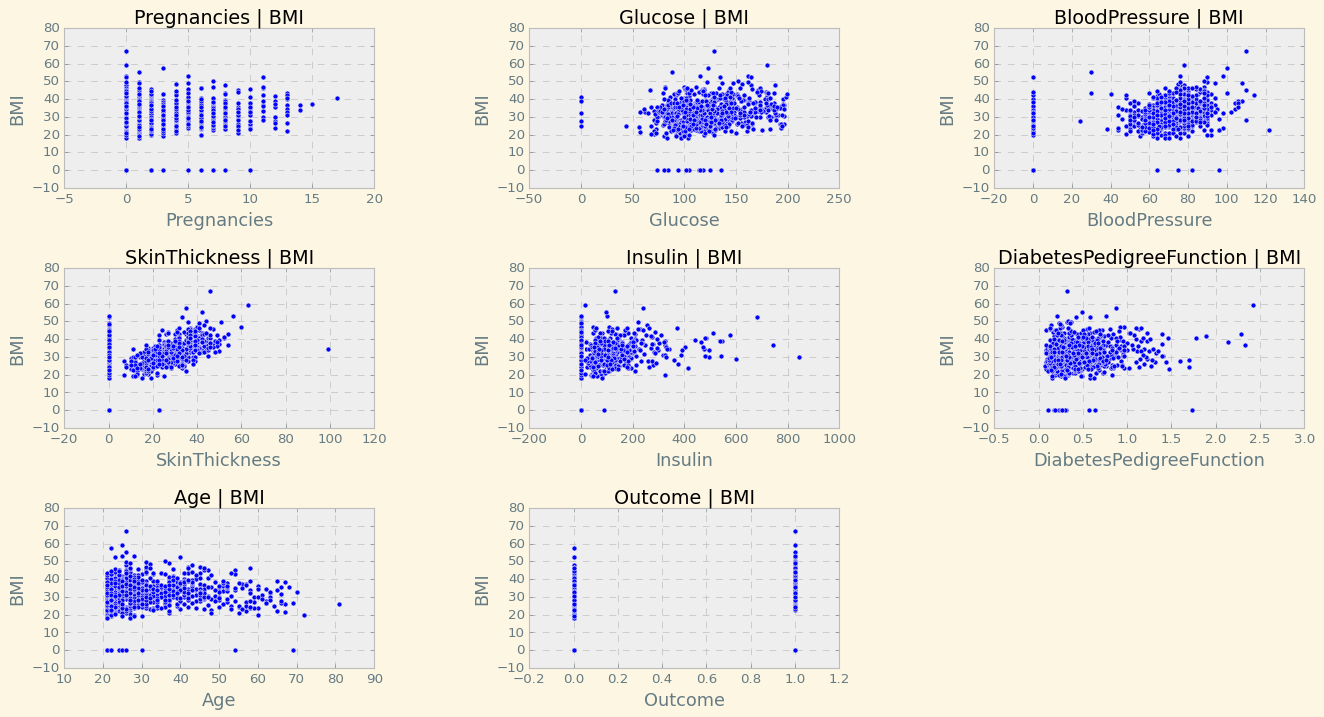

----------------------------------------------------------------------------------------------------


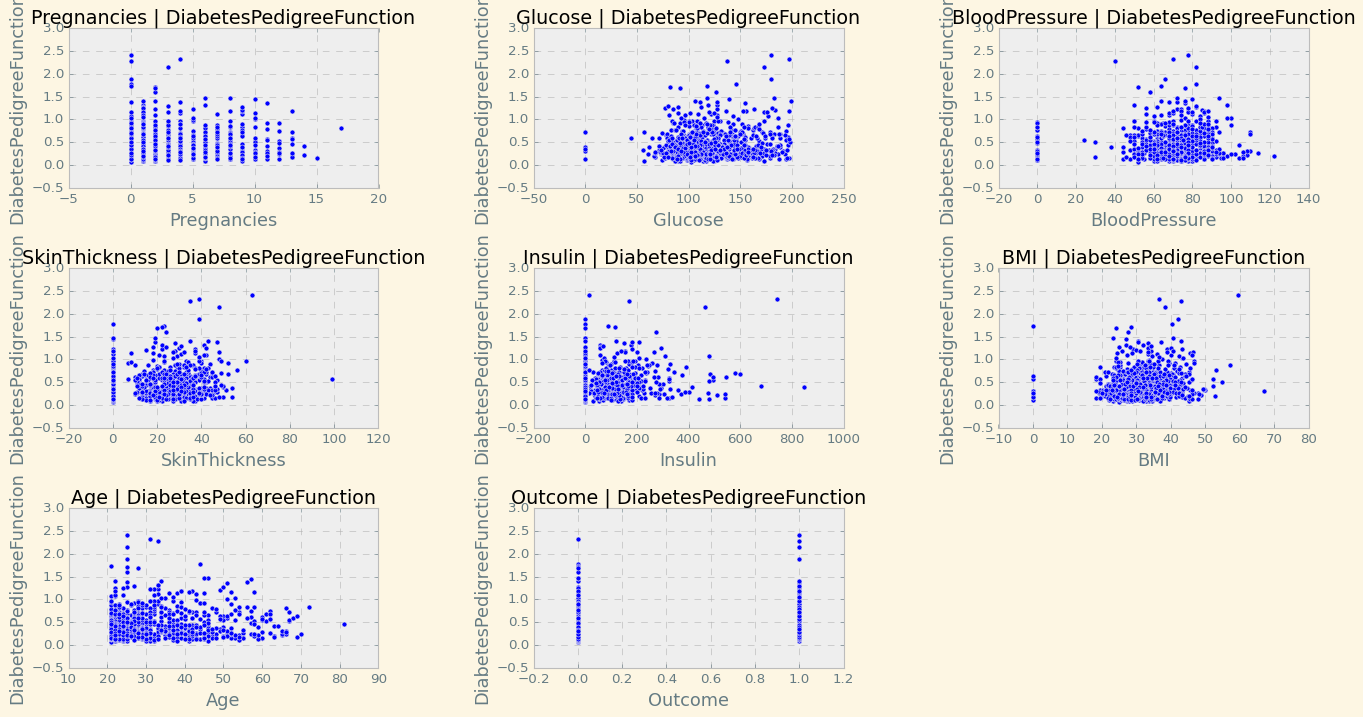

----------------------------------------------------------------------------------------------------


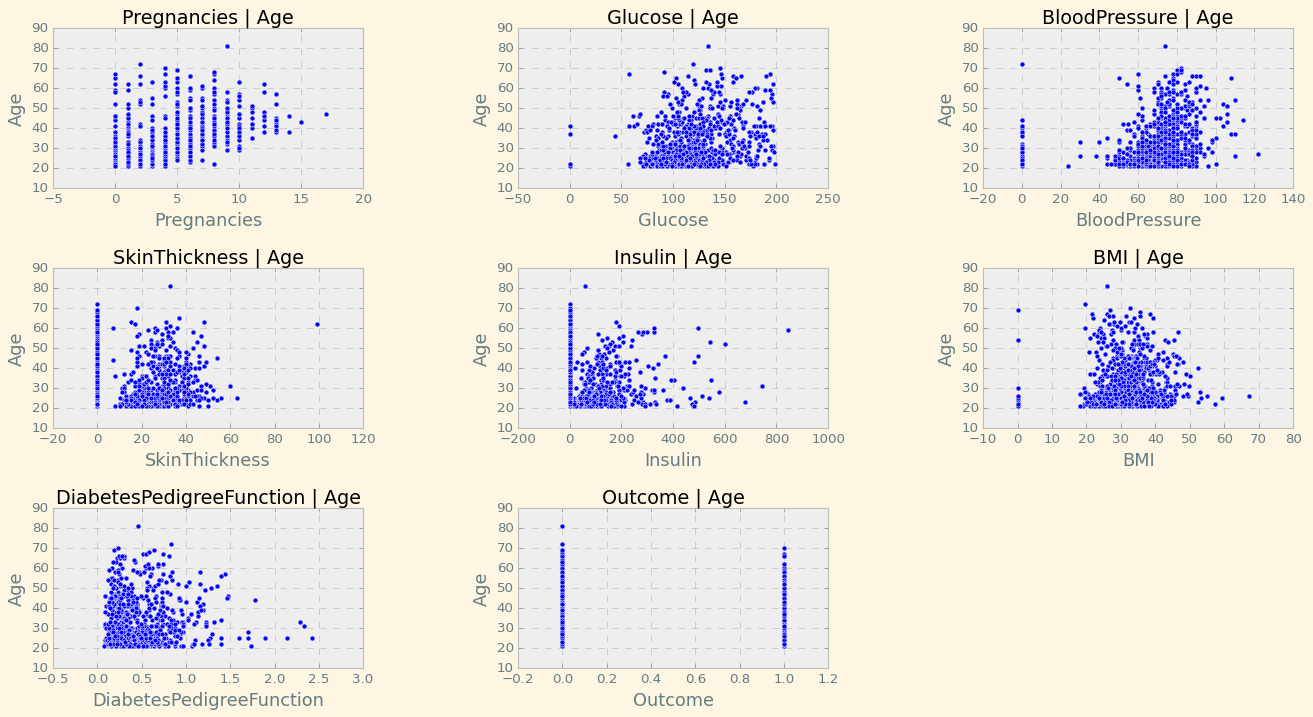

----------------------------------------------------------------------------------------------------


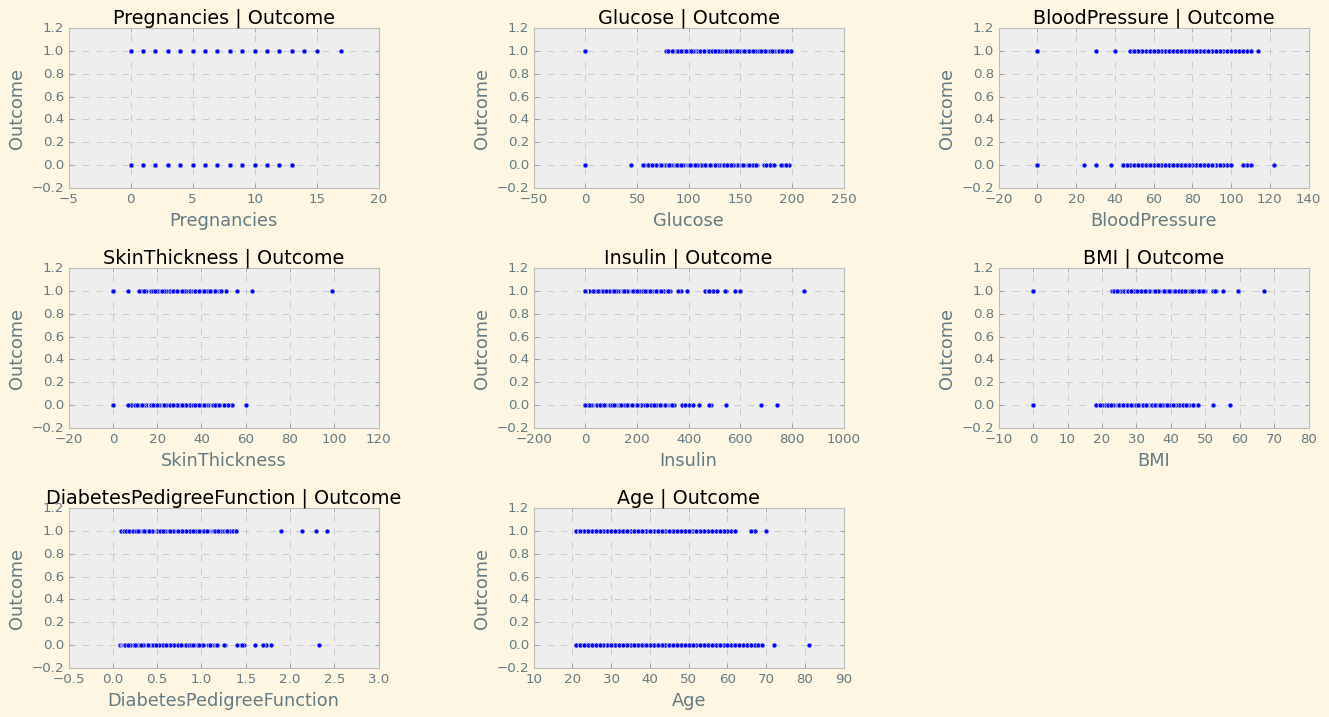

In [171]:
############### Draw Scatter plot ##########################

# setting the grid size and the font to eaisly change them if i want
gridSize = 3
fontSize = 16

# Note: col2 must be the target value that i look for
for col2 in df:
  i = 1
  # Customize the figureSize of the grid
  plt.figure(figsize=(20,10))
  for col1 in df:
    if col1 == col2:
      continue # we do not want the same column with its self

    # Draw the scatter and add some styling to it
    plt.style.use("bmh")
    plt.subplot(gridSize,gridSize,i)
    plt.scatter(x=col1, y=col2, data=df)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    plt.title(f"{col1} | {col2}")
    plt.xlabel(f"{col1}", fontsize=fontSize)
    plt.ylabel(f"{col2}", fontsize=fontSize)

    i = i + 1 if i < gridSize ** 2 else 1 #index of the plot in the grid

  print(line) # add a line break
  plt.show() # draw the grid



<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


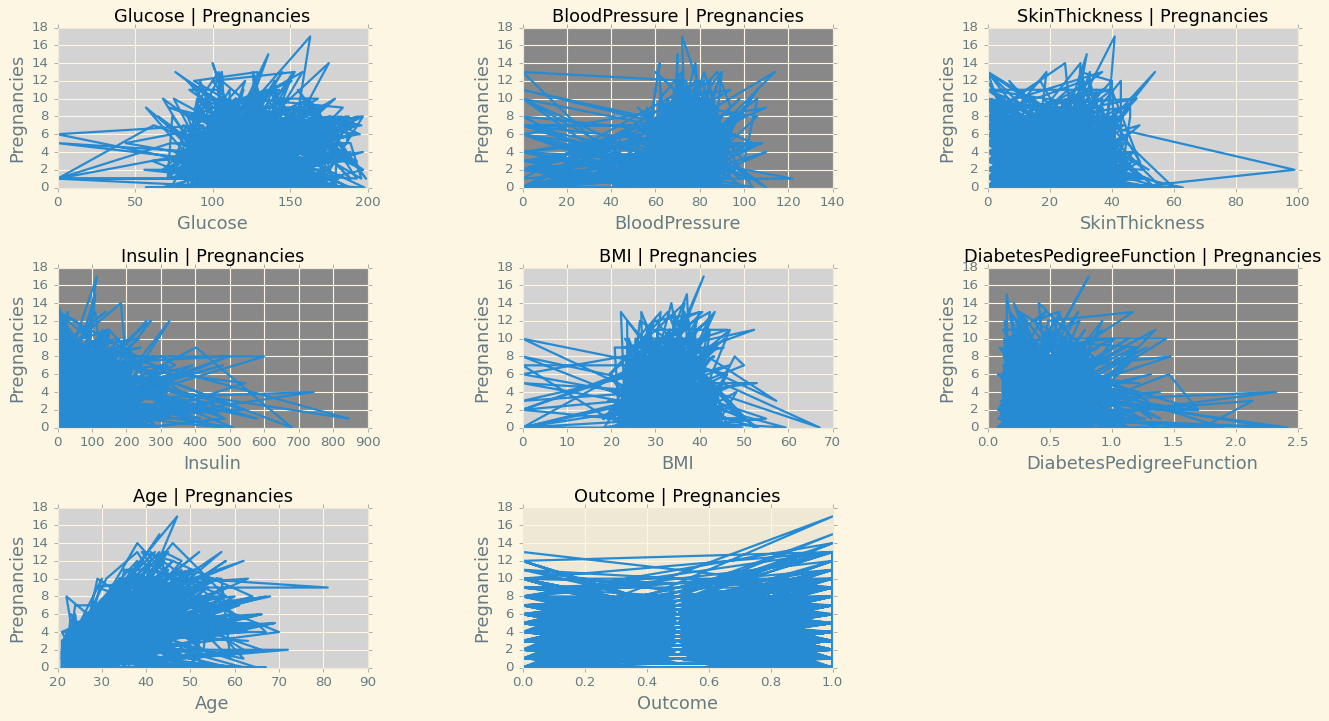

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


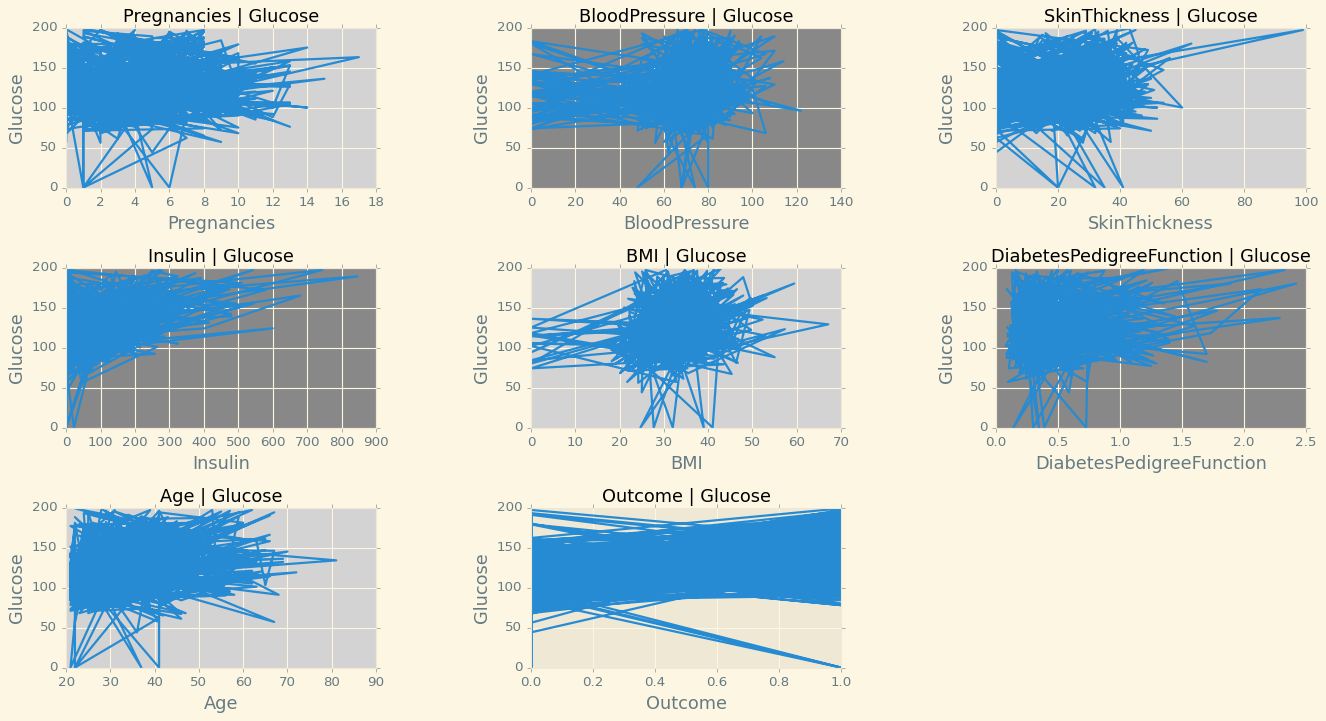

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


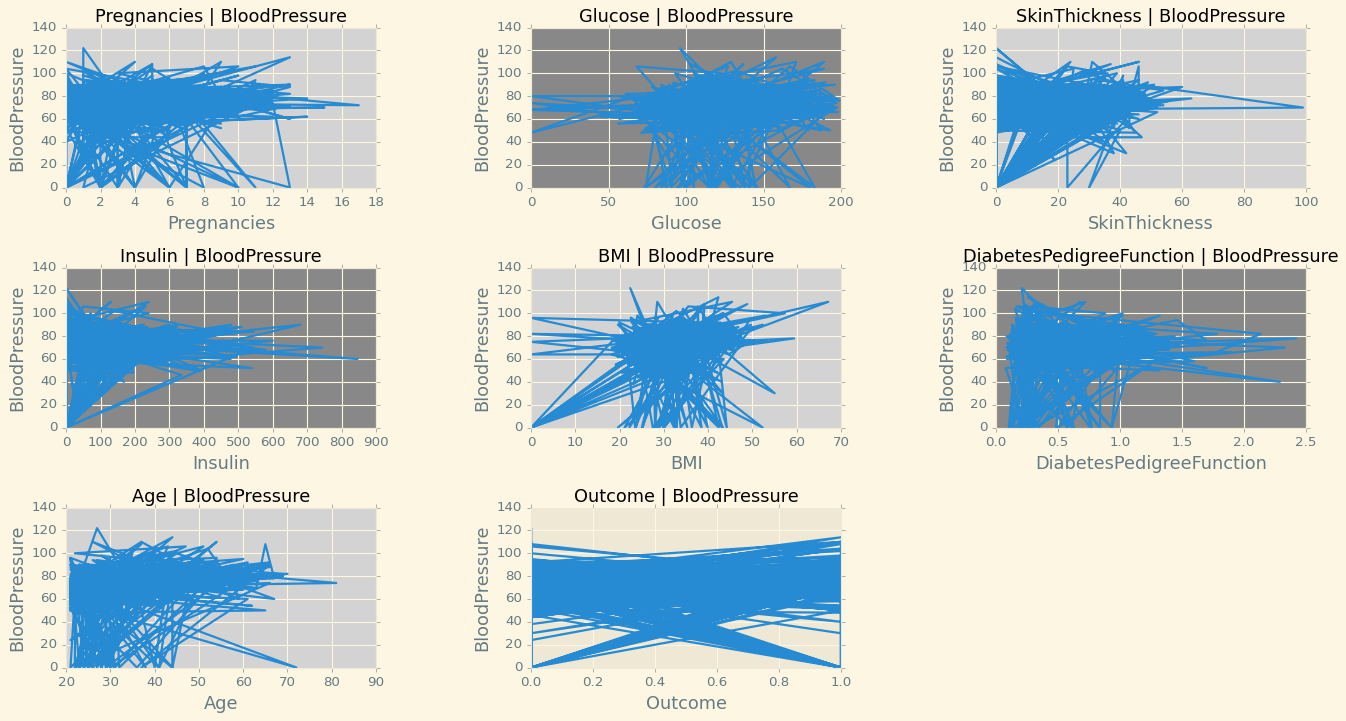

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


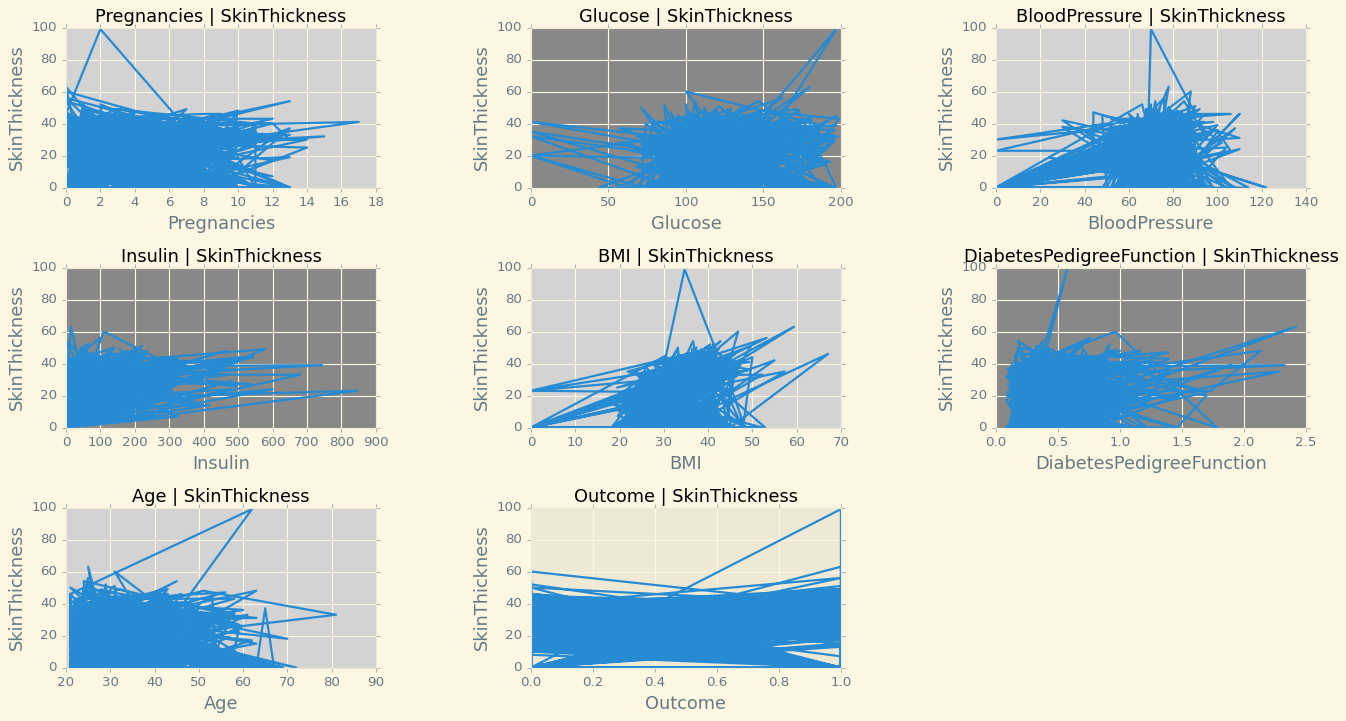

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


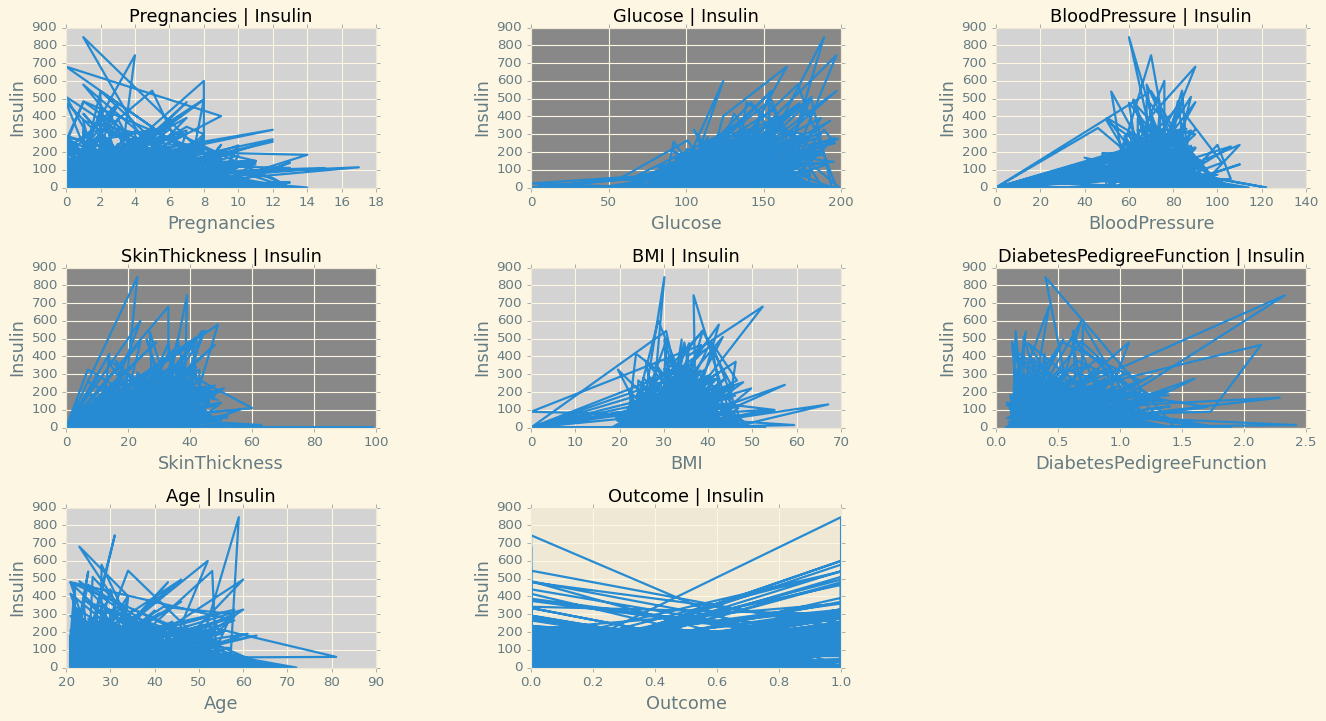

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


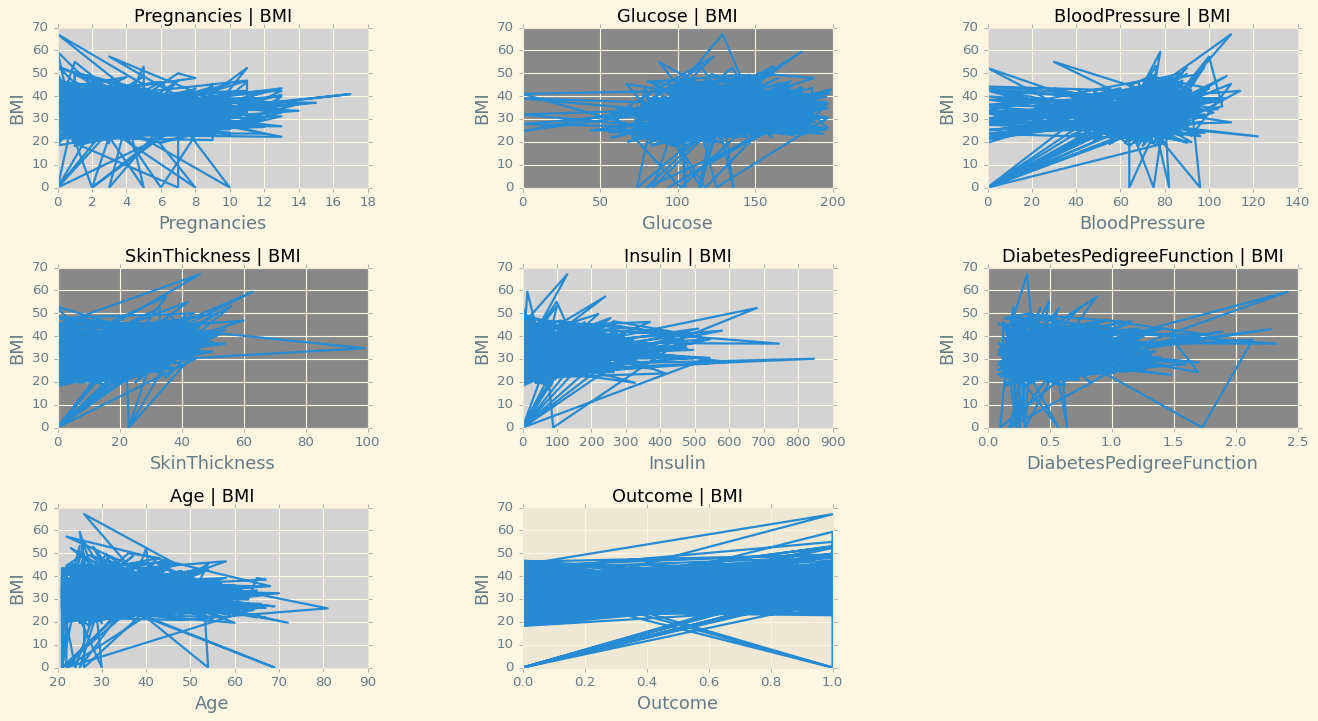

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


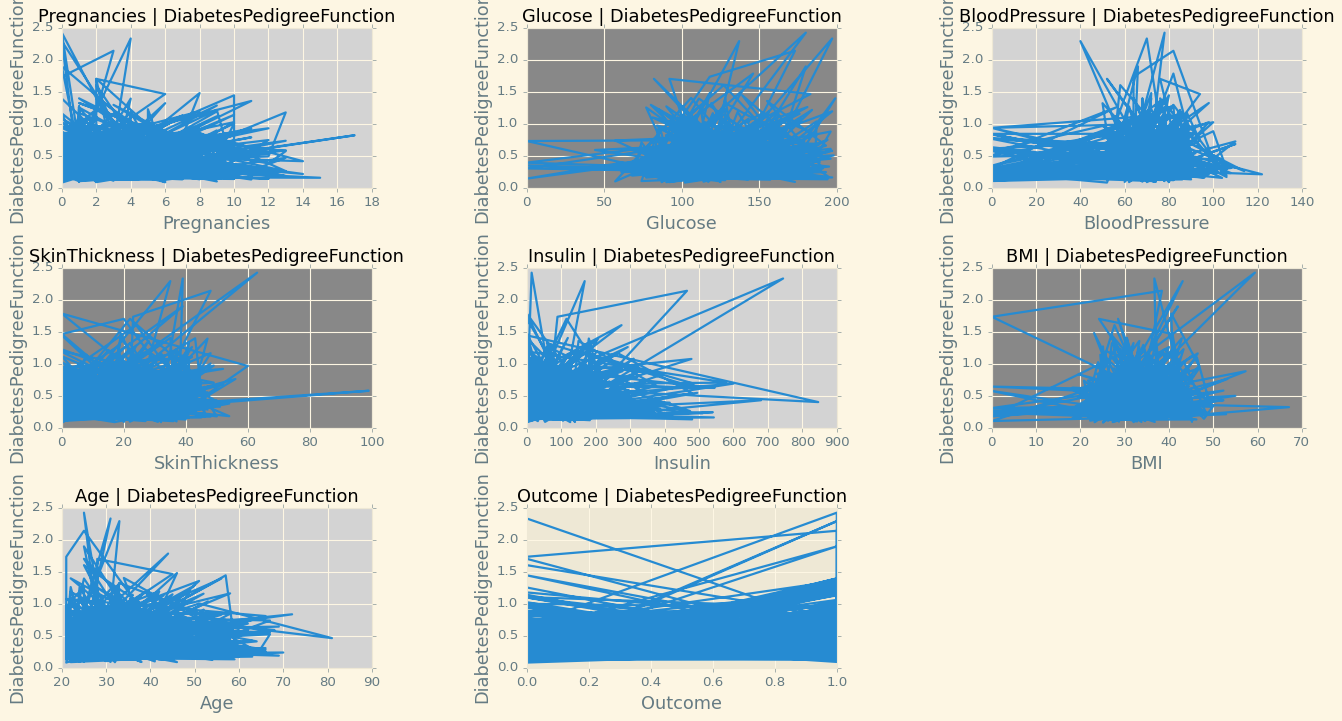

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


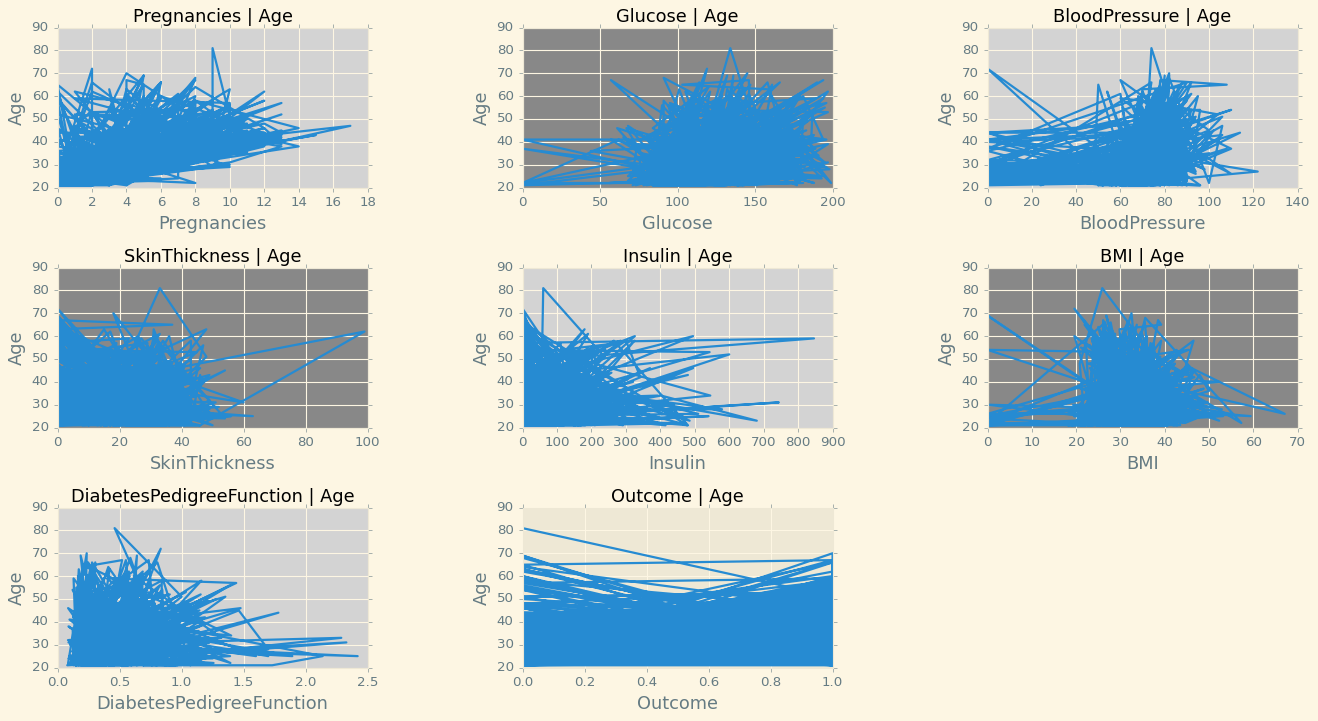

<ipython-input-172-9795151201a0>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridSize, gridSize, i)


--------------------------------------------------


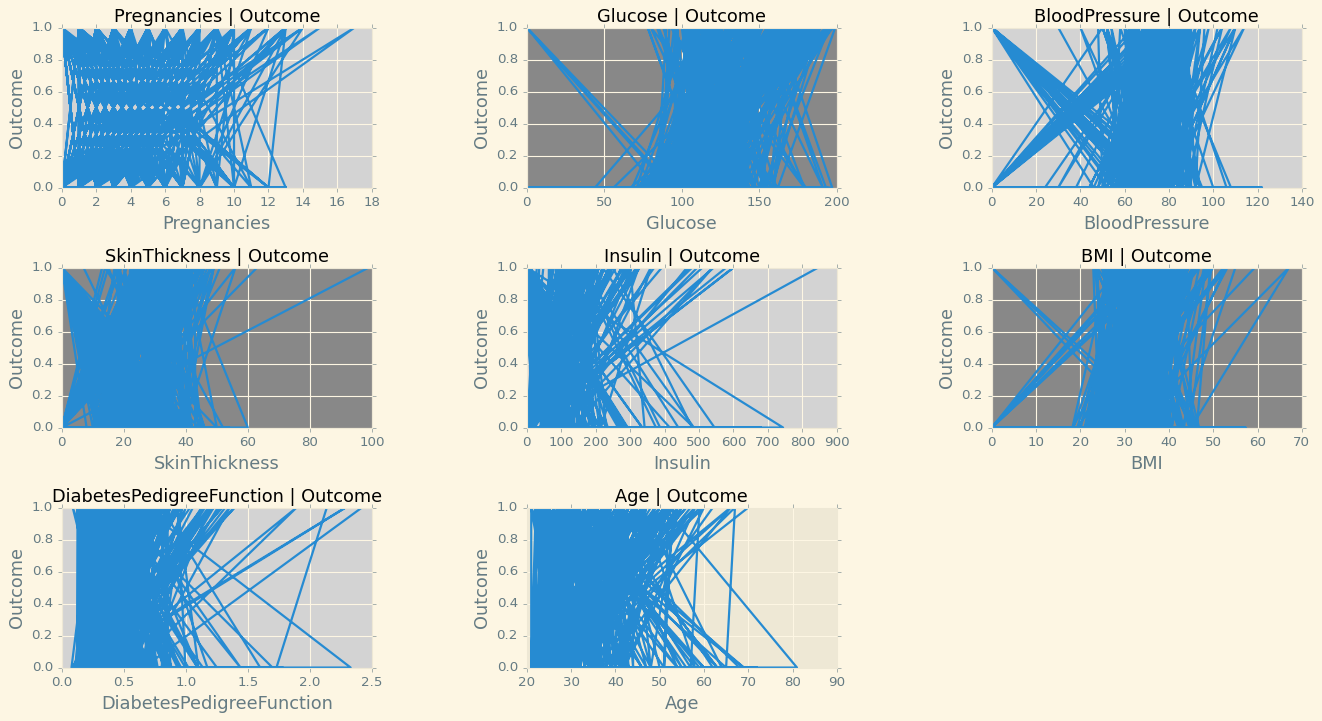

In [172]:
############### Draw Line Plot ##########################

# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Note: col2 must be the target value that is being looked for
for col2 in df:
    i = 1
    # Customize the figure size of the grid
    plt.figure(figsize=(20, 10))
    for col1 in df:
        if col1 == col2:
            continue  # Skip if the columns are the same

        plt.style.use('Solarize_Light2')

        # Change background color for alternate subplots
        if i % 2 == 0:
            plt.gca().set_facecolor('lightgrey')  # Set background color for even subplots
        else:
            plt.gca().set_facecolor('#888888')  # Set background color for odd subplots



        plt.subplot(gridSize, gridSize, i)

        # Draw the line plot and adjust its styling
        plt.plot(df[col1], df[col2])
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title(f"{col1} | {col2}")
        plt.xlabel(f"{col1}", fontsize=fontSize)
        plt.ylabel(f"{col2}", fontsize=fontSize)

        i = i + 1 if i < gridSize ** 2 else 1  # Index of the plot in the grid

    print("-" * 50)  # Add a line break
    plt.show()  # Draw the grid


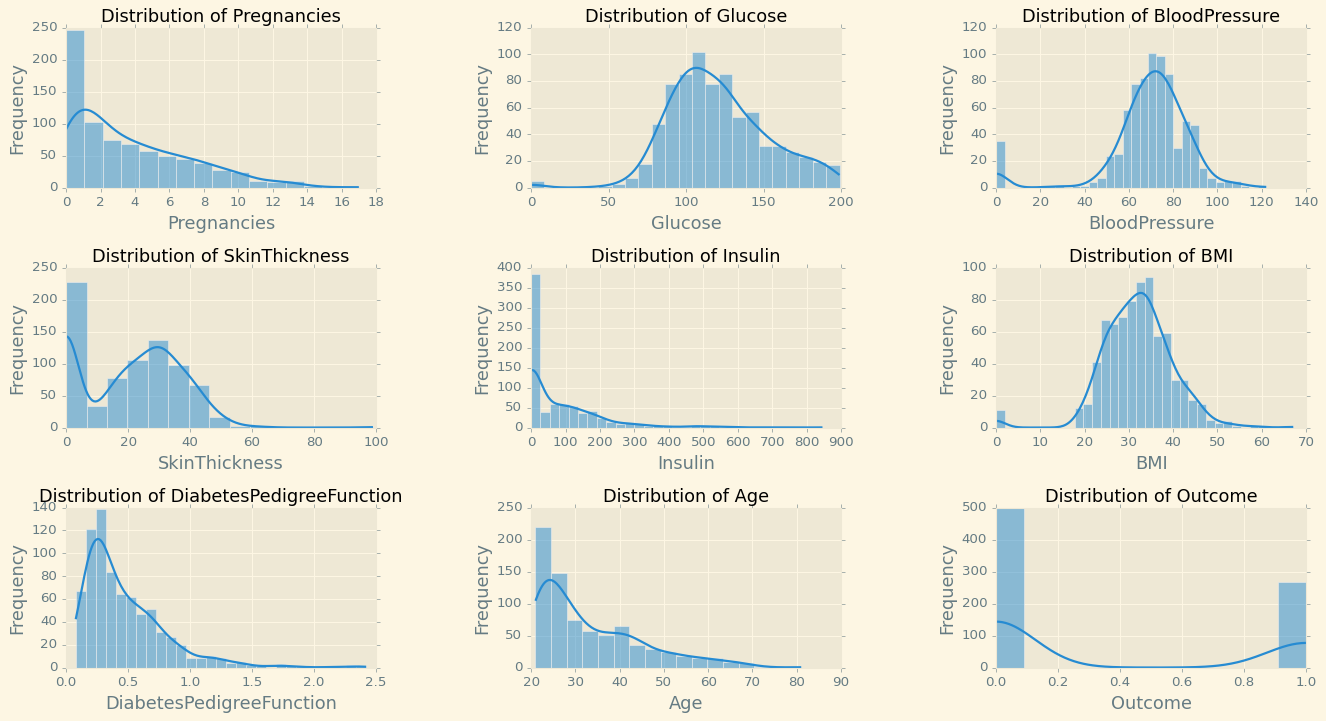

<Figure size 1600x800 with 0 Axes>

In [173]:
############### Draw Distribution Plots ##########################


# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Create the figure outside the loop
plt.figure(figsize=(20, 10))
plt.style.use('Solarize_Light2')

i = 1
for col1 in df:
    plt.subplot(gridSize, gridSize, i)
    sns.histplot(df[col1], kde=True)  # Use sns.kdeplot for KDE plot
    plt.title(f"Distribution of {col1}")
    plt.xlabel(f"{col1}", fontsize=fontSize)
    plt.ylabel("Frequency", fontsize=fontSize)

    if i < gridSize ** 2:
        i += 1
    else:
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.show()
        plt.figure(figsize=(20, 10))
        plt.style.use('Solarize_Light2')
        i = 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()  # Display any remaining plots


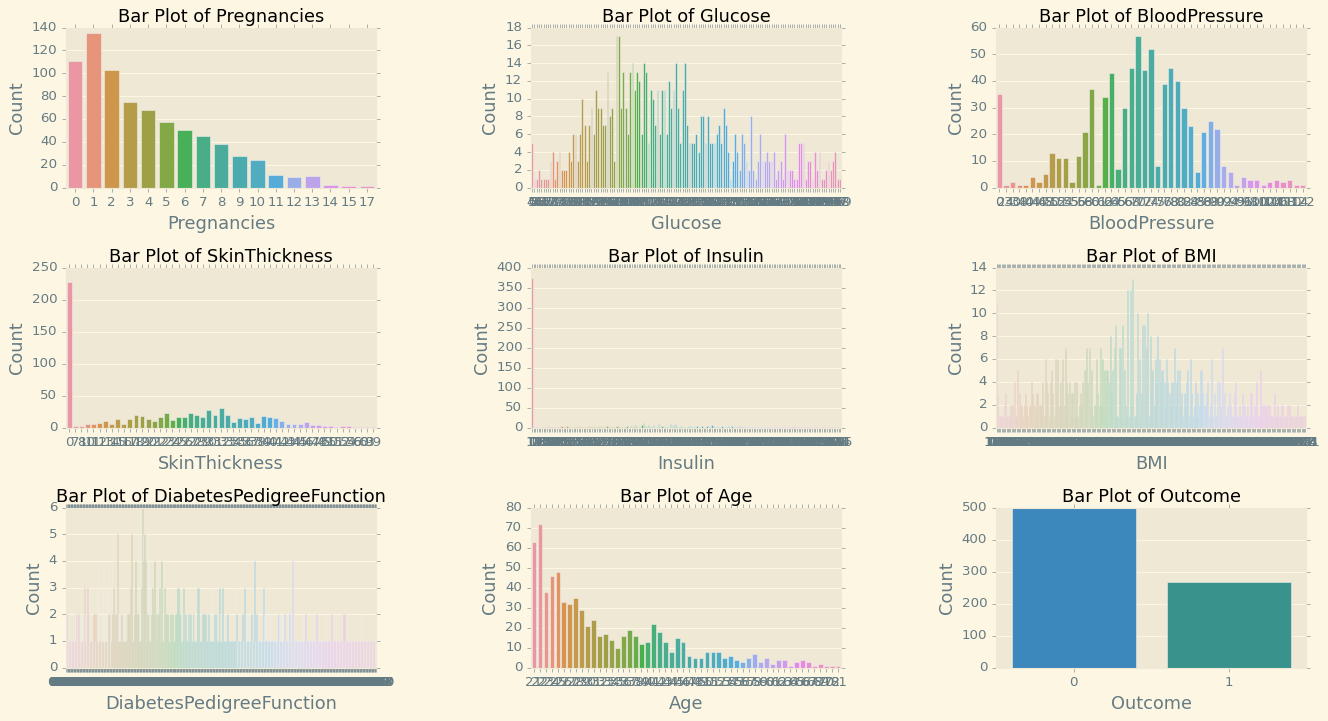

<Figure size 1600x800 with 0 Axes>

In [174]:
############### Draw Bar Plots ##########################

# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Create the figure outside the loop
plt.figure(figsize=(20, 10))
plt.style.use('Solarize_Light2')

i = 1
for col1 in df:
    plt.subplot(gridSize, gridSize, i)
    sns.countplot(x=df[col1])  # Use sns.countplot() for bar plots
    plt.title(f"Bar Plot of {col1}")
    plt.xlabel(f"{col1}", fontsize=fontSize)
    plt.ylabel("Count", fontsize=fontSize)

    if i < gridSize ** 2:
        i += 1
    else:
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.show()
        plt.figure(figsize=(20, 10))
        plt.style.use('Solarize_Light2')
        i = 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()  # Display any remaining plots


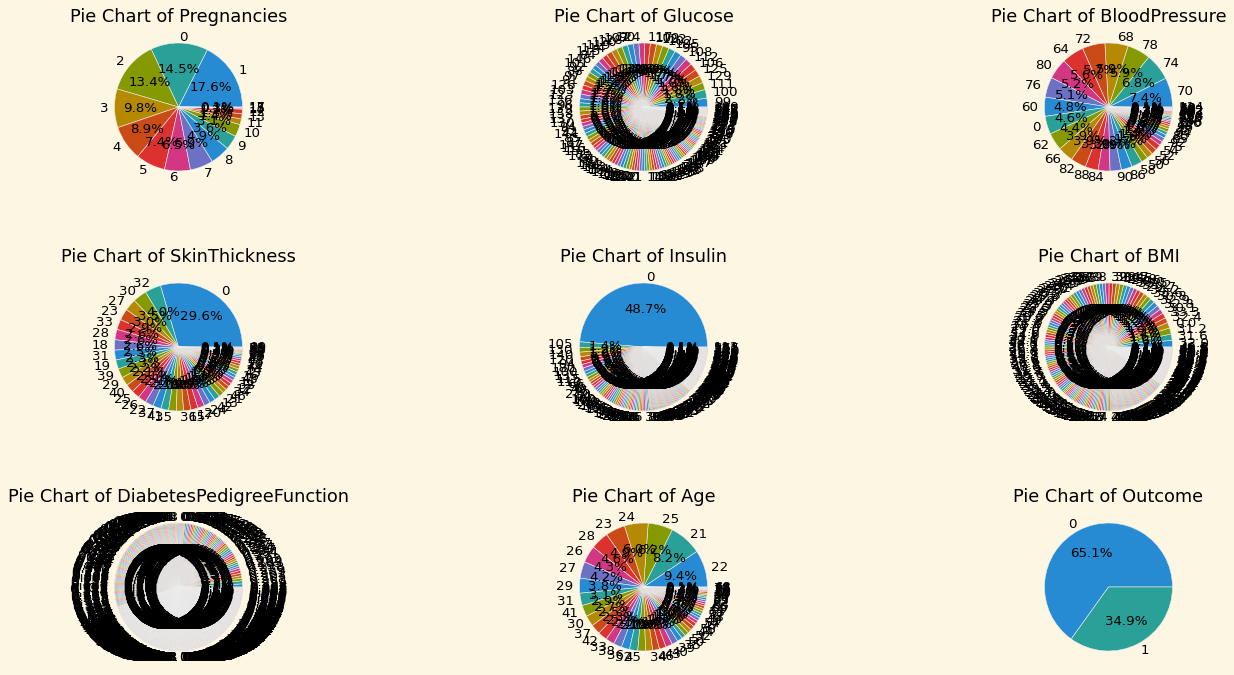

<Figure size 1600x800 with 0 Axes>

In [175]:
############### Draw Pie Charts ##########################

# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Create the figure outside the loop
plt.figure(figsize=(20, 10))
plt.style.use('Solarize_Light2')

i = 1
for col1 in df:
    plt.subplot(gridSize, gridSize, i)
    labels = df[col1].value_counts().index.tolist()
    sizes = df[col1].value_counts().tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Pie Chart of {col1}")

    if i < gridSize ** 2:
        i += 1
    else:
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.show()
        plt.figure(figsize=(20, 10))
        plt.style.use('Solarize_Light2')
        i = 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()  # Display any remaining plots


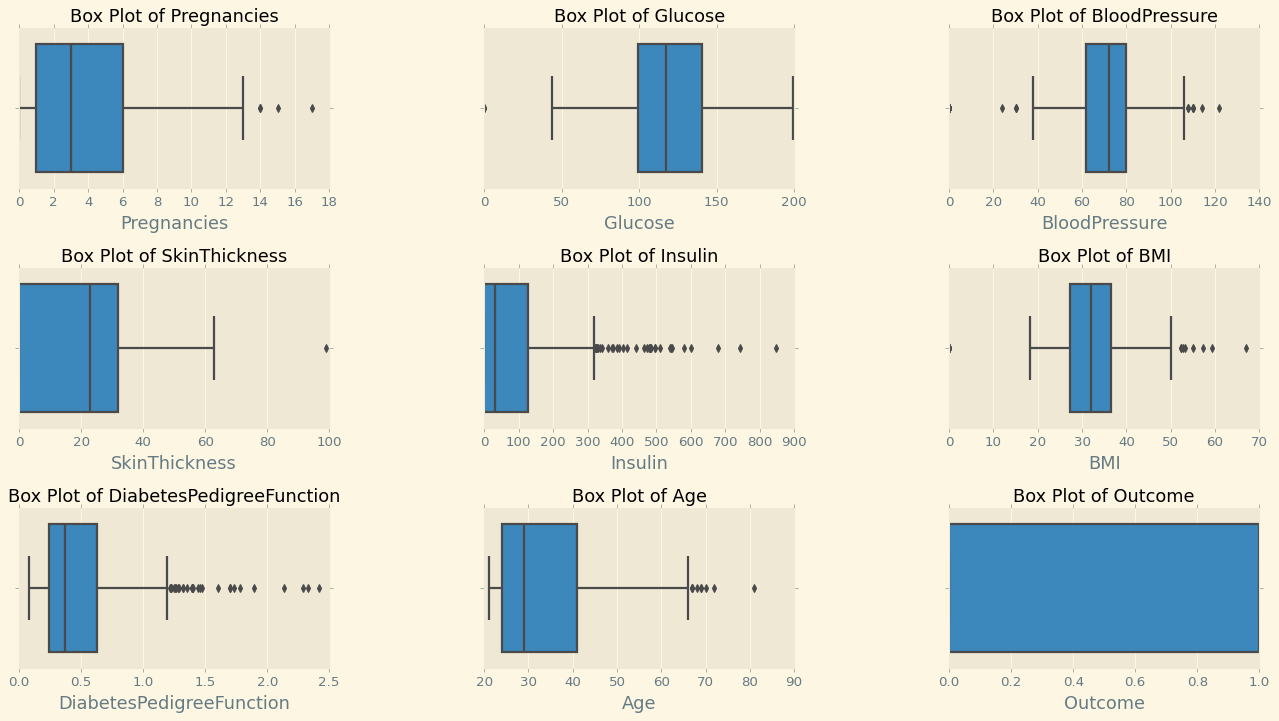

<Figure size 1600x800 with 0 Axes>

In [176]:
############### Draw Boxplots ##########################


# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Create the figure outside the loop
plt.figure(figsize=(20, 10))
plt.style.use('Solarize_Light2')

i = 1
for col1 in df:
    plt.subplot(gridSize, gridSize, i)
    sns.boxplot(x=df[col1])  # Use sns.boxplot() for box plots
    plt.title(f"Box Plot of {col1}")
    plt.xlabel(f"{col1}", fontsize=fontSize)

    if i < gridSize ** 2:
        i += 1
    else:
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.show()
        plt.figure(figsize=(20, 10))
        plt.style.use('Solarize_Light2')
        i = 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()  # Display any remaining plots


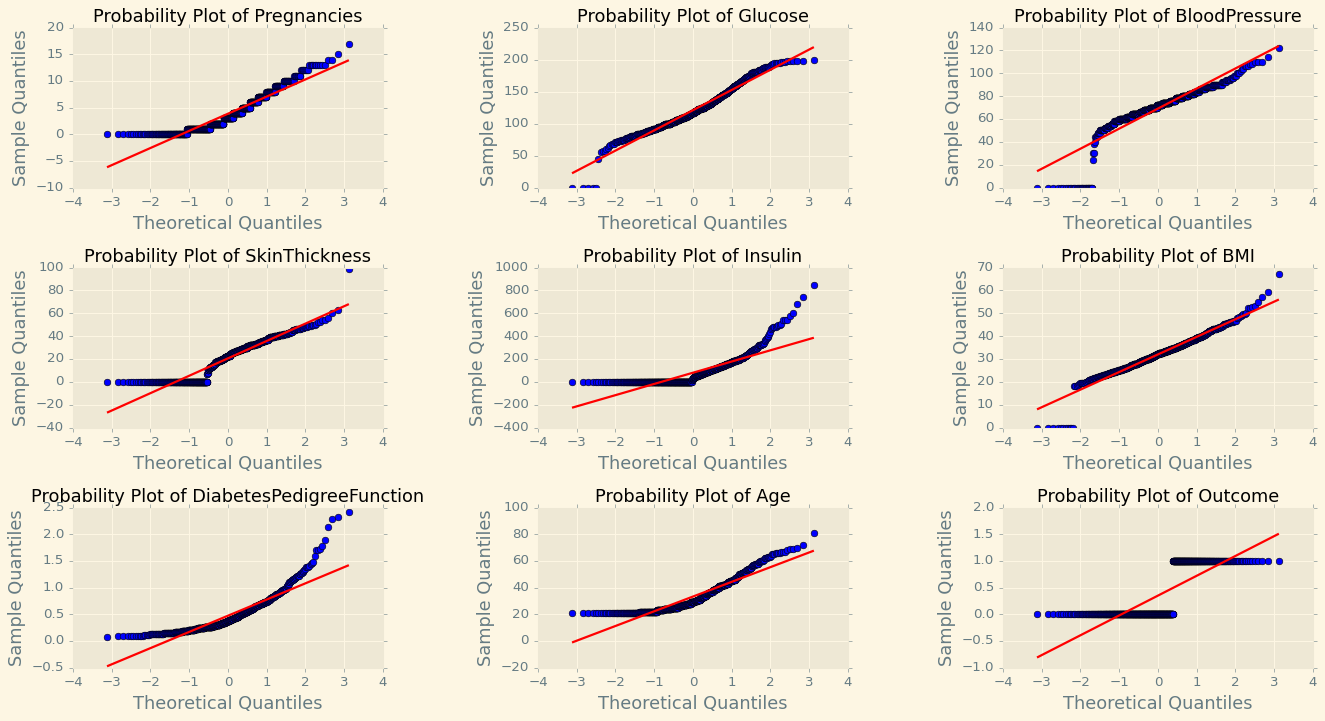

<Figure size 1600x800 with 0 Axes>

In [177]:
############### Draw Probability Plots ##########################


# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Create the figure outside the loop
plt.figure(figsize=(20, 10))
plt.style.use('Solarize_Light2')

i = 1
for col1 in df:
    plt.subplot(gridSize, gridSize, i)
    stats.probplot(df[col1], plot=plt)
    plt.title(f"Probability Plot of {col1}")
    plt.xlabel("Theoretical Quantiles", fontsize=fontSize)
    plt.ylabel("Sample Quantiles", fontsize=fontSize)

    if i < gridSize ** 2:
        i += 1
    else:
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.show()
        plt.figure(figsize=(20, 10))
        plt.style.use('Solarize_Light2')
        i = 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()  # Display any remaining plots


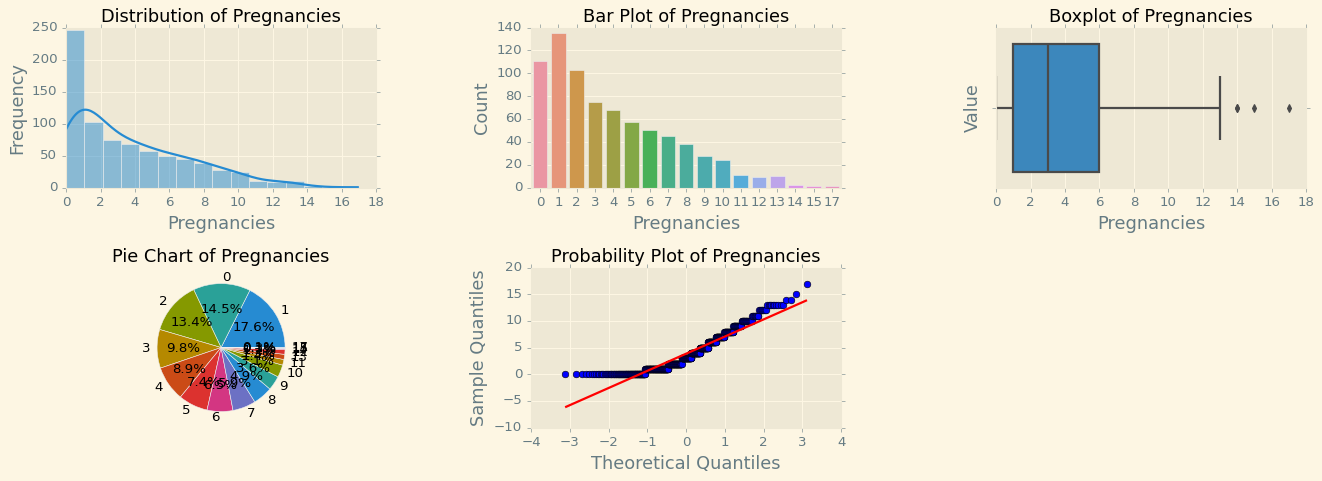

--------------------------------------------------


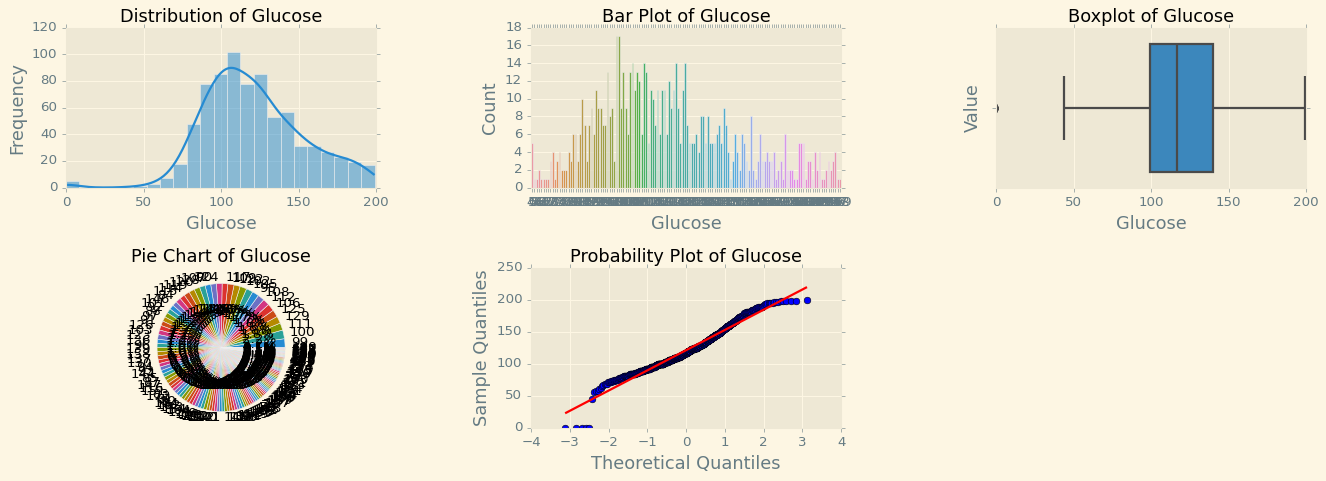

--------------------------------------------------


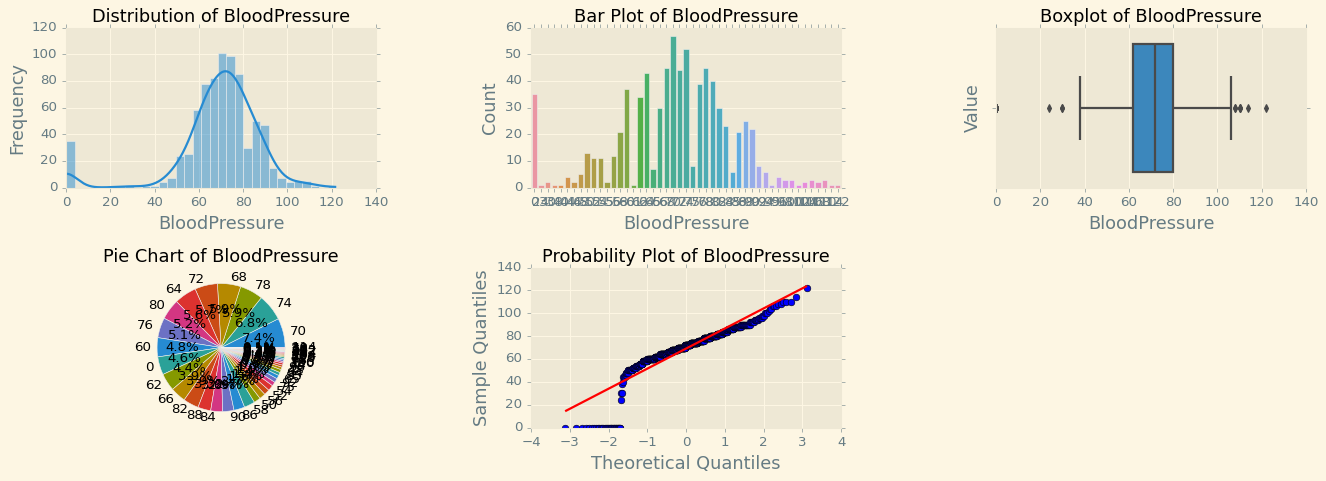

--------------------------------------------------


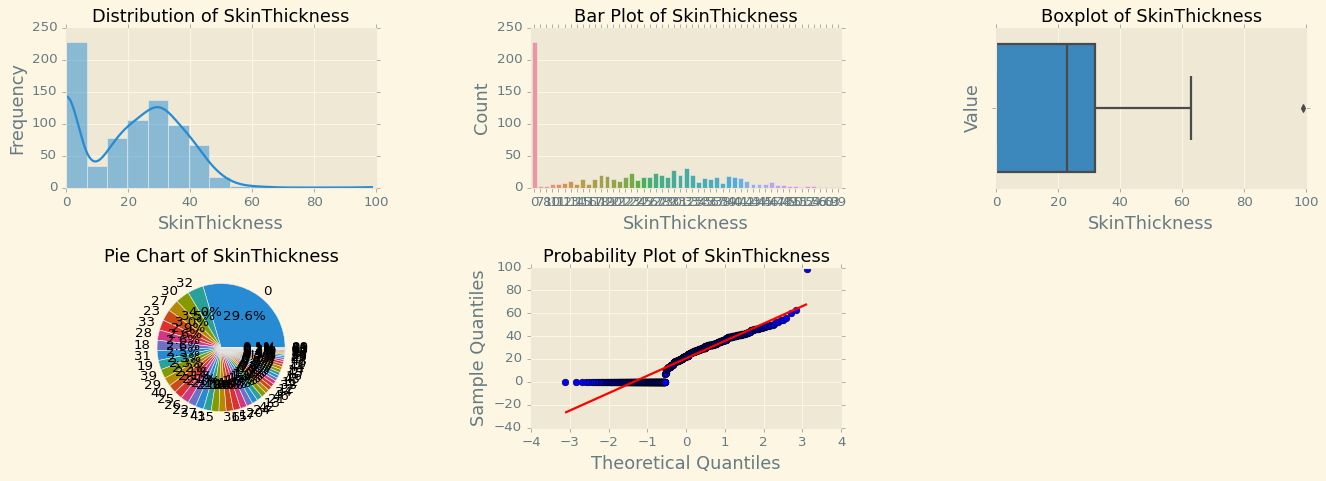

--------------------------------------------------


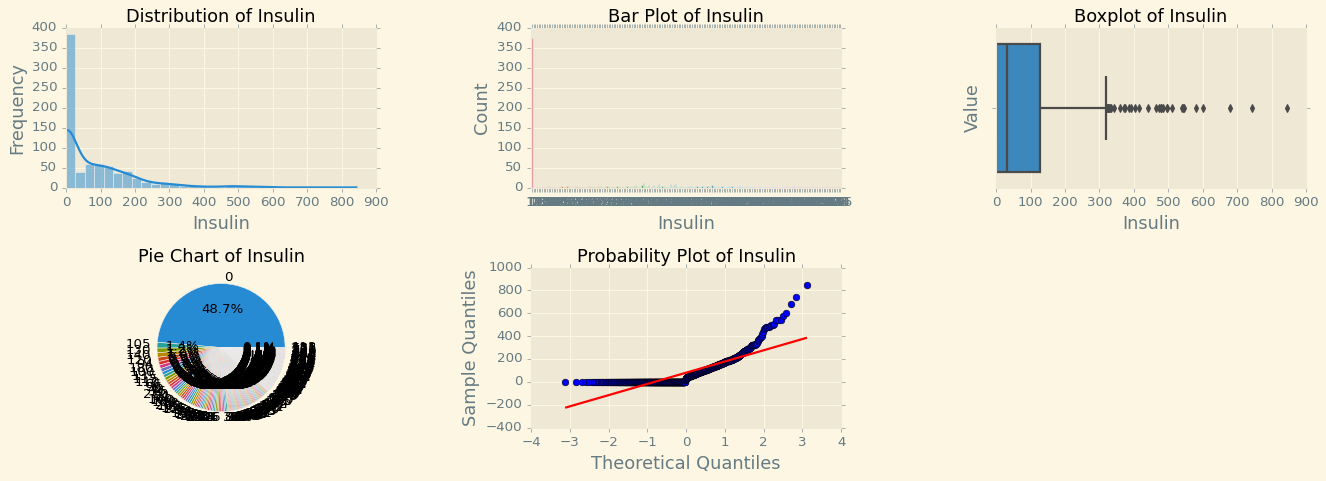

--------------------------------------------------


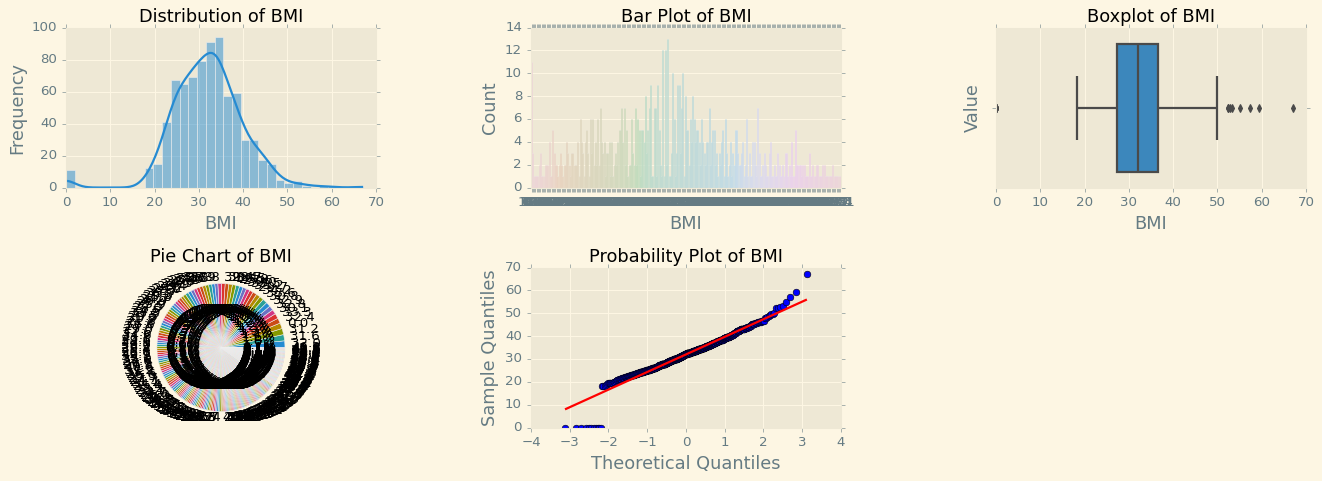

--------------------------------------------------


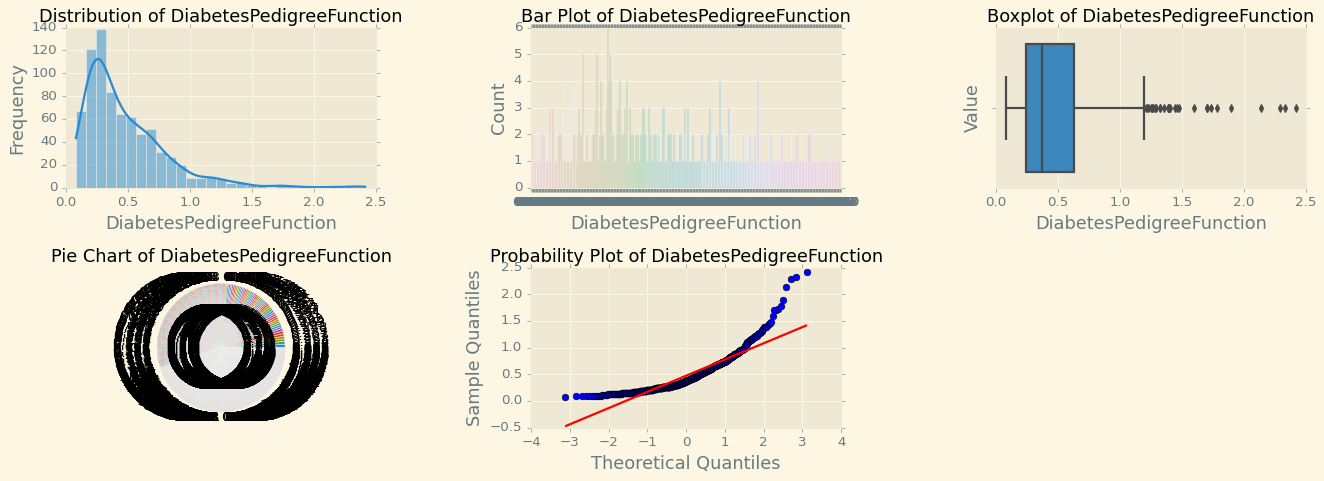

--------------------------------------------------


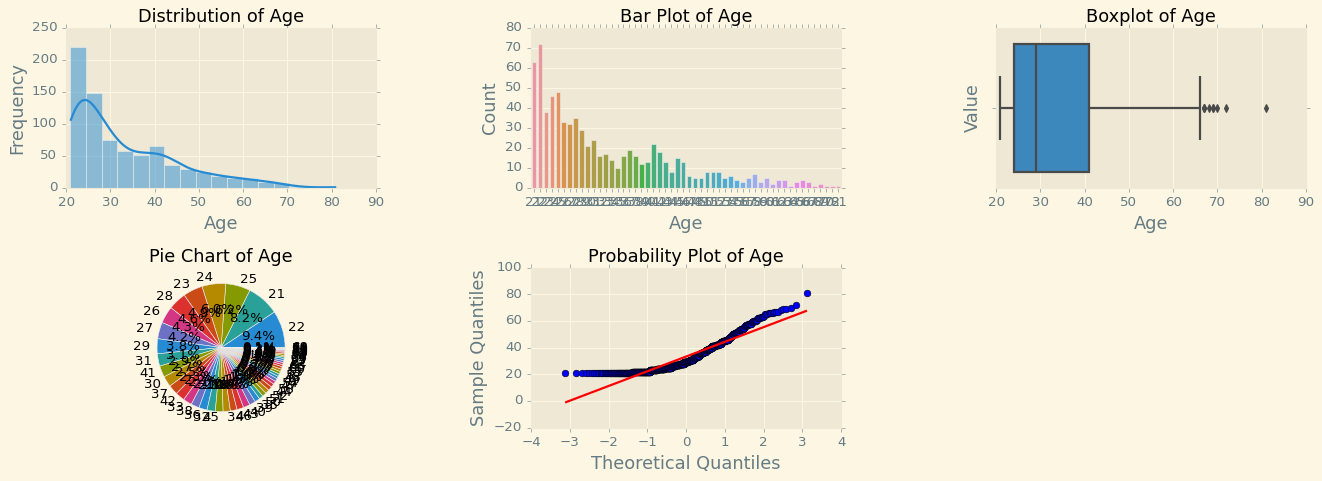

--------------------------------------------------


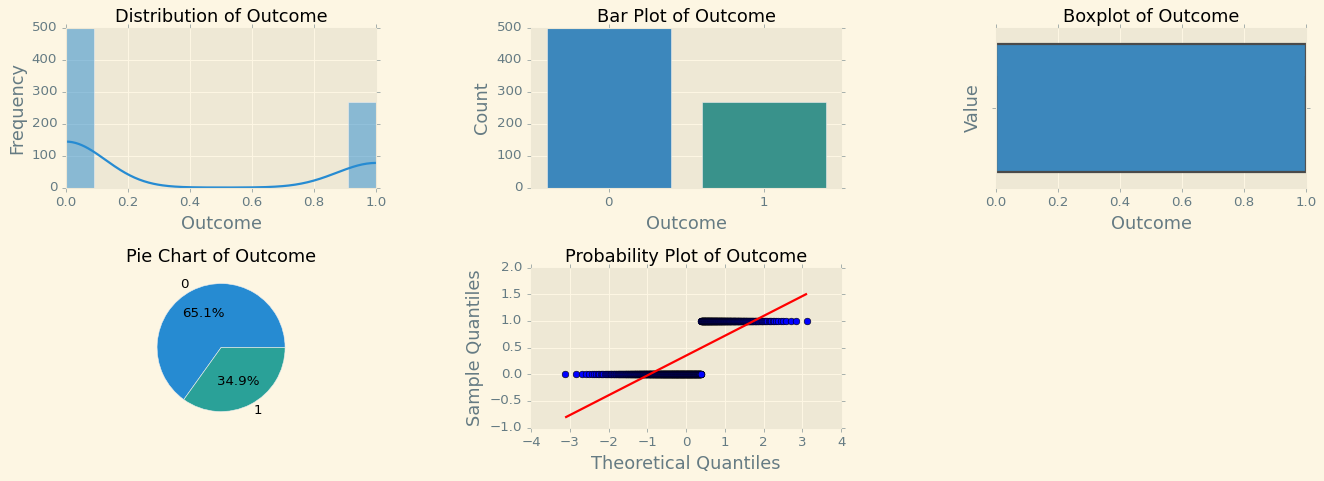

--------------------------------------------------


In [178]:
############### Combine All the Plots Together for same column ##########################

# Setting the grid size and font size
gridSize = 3
fontSize = 16

# Note: col2 must be the target value that is being looked for
for col1 in df:
    # i = 1
    # Customize the figure size of the grid
    plt.figure(figsize=(20, 10))
    plt.style.use('Solarize_Light2')




    plt.subplot(gridSize, gridSize, 1)
    # Distrbution plot
    # Draw the distribution plot and adjust its styling
    sns.histplot(df[col1], kde=True)  # Use sns.kdeplot for KDE plot
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title(f"Distribution of {col1}")
    plt.xlabel(f"{col1}", fontsize=fontSize)
    plt.ylabel("Frequency", fontsize=fontSize)
    # i = i + 1 if i < gridSize ** 2 else 1  # Index of the plot in the grid

    # Create a bar plot
    plt.subplot(gridSize, gridSize, 2)
    sns.countplot(x=col1, data=df)
    plt.title(f"Bar Plot of {col1}")
    plt.xlabel(f"{col1}", fontsize=fontSize)
    plt.ylabel("Count", fontsize=fontSize)



    # Create a boxplot
    plt.subplot(gridSize, gridSize, 3)
    sns.boxplot(x=col1, data=df)
    plt.title(f"Boxplot of {col1}")
    plt.xlabel(f"{col1}", fontsize=fontSize)
    plt.ylabel("Value", fontsize=fontSize)


    # Create a pie chart
    plt.subplot(gridSize, gridSize, 4)
    labels = df[col1].value_counts().index.tolist()
    sizes = df[col1].value_counts().tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Pie Chart of {col1}")

    plt.subplot(gridSize, gridSize, 5)
    stats.probplot(df[col1], plot=plt)
    plt.title(f"Probability Plot of {col1}")
    plt.xlabel("Theoretical Quantiles", fontsize=fontSize)
    plt.ylabel("Sample Quantiles", fontsize=fontSize)



    plt.show()  # Draw the grid
    print("-" * 50)  # Add a line break


In [179]:
# Initialize an empty DataFrame to store the results
descriptive_stats = pd.DataFrame()

# Define the statistics functions
functions = {
    'Mean': lambda x: x.mean(),
    'Median': lambda x: x.median(),
    'Mode': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Std': lambda x: x.std(),
    'Var': lambda x: x.var(),
    'Min': lambda x: x.min(),
    '25th Percentile': lambda x: x.quantile(0.25),
    '50th Percentile': lambda x: x.quantile(0.5),
    '75th Percentile': lambda x: x.quantile(0.75),
    'Max': lambda x: x.max(),

    # Add more Features For Bonus :)😊
    'Skewness': lambda x: x.skew(), # Measure of asymmetry and the peakedness of a distribution.
    'Kurtosis': lambda x: x.kurtosis(), # Measure of asymmetry and the peakedness of a distribution.
    'Range': lambda x: x.max() - x.min(), # The difference between the maximum and minimum values.
    'IQR': lambda x: x.quantile(0.75) - x.quantile(0.25), # Range (IQR): The range of the middle 50% of the data (difference between the 75th and 25th percentiles).
    'MAD': lambda x: x.mad(), # Mean Absolute Deviation (MAD): Average of the absolute differences between each value and the mean.
    'CV': lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan, # # Coefficient of Variation (CV): Ratio of the standard deviation to the mean, representing the relative variability.
}


data = {col: df[col].agg(functions) for col in df}



# Create a DataFrame from the transposed result
finalStatistics = pd.DataFrame(data)

finalStatistics

Pregnancies      Glucose  BloodPressure  SkinThickness  \
Mean                3.845052   120.894531      69.105469      20.536458   
Median              3.000000   117.000000      72.000000      23.000000   
Mode                1.000000    99.000000      70.000000       0.000000   
Std                 3.369578    31.972618      19.355807      15.952218   
Var                11.354056  1022.248314     374.647271     254.473245   
Min                 0.000000     0.000000       0.000000       0.000000   
25th Percentile     1.000000    99.000000      62.000000       0.000000   
50th Percentile     3.000000   117.000000      72.000000      23.000000   
75th Percentile     6.000000   140.250000      80.000000      32.000000   
Max                17.000000   199.000000     122.000000      99.000000   
Skewness            0.901674     0.173754      -1.843608       0.109372   
Kurtosis            0.159220     0.640780       5.180157      -0.520072   
Range              17.000000   199.000000     122.000000      99.000000   
IQR                 5.000000    41.250000      18.000000      32.000000   
MAD                 2.771620    25.181793      12.639425      13.659627   
CV                  0.876341     0.264467       0.280091       0.776775   

                      Insulin        BMI  DiabetesPedigreeFunction  \
Mean                79.799479  31.992578                  0.471876   
Median              30.500000  32.000000                  0.372500   
Mode                 0.000000  32.000000                  0.254000   
Std                115.244002   7.884160                  0.331329   
Var              13281.180078  62.159984                  0.109779   
Min                  0.000000   0.000000                  0.078000   
25th Percentile      0.000000  27.300000                  0.243750   
50th Percentile     30.500000  32.000000                  0.372500   
75th Percentile    127.250000  36.600000                  0.626250   
Max                846.000000  67.100000                  2.420000   
Skewness             2.272251  -0.428982                  1.919911   
Kurtosis             7.214260   3.290443                  5.594954   
Range              846.000000  67.100000                  2.342000   
IQR                127.250000   9.300000                  0.382500   
MAD                 84.505079   5.842270                  0.247309   
CV                   1.444170   0.246437                  0.702151   

                        Age   Outcome  
Mean              33.240885  0.348958  
Median            29.000000  0.000000  
Mode              22.000000  0.000000  
Std               11.760232  0.476951  
Var              138.303046  0.227483  
Min               21.000000  0.000000  
25th Percentile   24.000000  0.000000  
50th Percentile   29.000000  0.000000  
75th Percentile   41.000000  1.000000  
Max               81.000000  1.000000  
Skewness           1.129597  0.635017  
Kurtosis           0.643159 -1.600930  
Range             60.000000  1.000000  
IQR               17.000000  1.000000  
MAD                9.586405  0.454373  
CV                 0.353788  1.366786

# Information 😊
- **Name:** Mohamed Ibrahim Sayed
- **ID:** 236671
- **Course:** Probability And Statistics

---

